# Import Essential Libraries

In [8]:
import numpy as np
import pandas as pd

# Plotting tools
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import Word2Vec

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

## Import Plotly

In [9]:
# Using plotly.express
import plotly.express as px
import plotly.graph_objects as go

## Natural Language Processing (NLP) Libraries


In [10]:
import re
from pprint import pprint

import csv
import string

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# spacy for lemmatization
import spacy


### NLTK Package

In [11]:
# NLTK Stop words
import nltk
nltk.download("stopwords")
# nltk.download()

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Mount Google Drive

In [12]:
import os

# mount drive
from google.colab import drive
drive.mount('/content/drive')


# edit this path if needed
my_path = '/content/drive/My Drive/Colab Notebooks/'
# my_path = '/content/drive/My Drive/NLP Code/'

# change to this path
os.chdir(my_path)

# verify present working directory. It should be identical to 'my_path'
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


# Import Text Data

In [13]:
df = pd.read_csv('data/news_articles.csv', encoding='latin-1')
display(df.head())
display(df.tail())

,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business


,Article,Date,Heading,NewsType
2687,strong>DUBAI: Dubai International Airport and ...,3/25/2017,Laptop ban hits Dubai for 11m weekend traveller,business
2688,"strong>BEIJING: Former Prime Minister, Shaukat...",3/26/2017,Pak China relations not against any third coun...,business
2689,strong>WASHINGTON: Uber has grounded its fleet...,3/26/2017,Uber grounds self driving cars after accid,business
2690,strong>BEIJING: The New Development Bank plans...,3/27/2017,New Development Bank plans joint investments i...,business
2691,strong>KARACHI: Karachi-based technology incub...,3/27/2017,Google powered Startup Weekend energizing prou...,business


# Tokenize: Parse each sentence to words/terms/tokens

In [14]:
df['token'] = df['Article'].apply (lambda x: gensim.utils.simple_preprocess(str(x), deacc=True))
display(df.head())

,Article,Date,Heading,NewsType,token
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business,"[karachi, the, sindh, government, has, decided..."
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business,"[hong, kong, asian, markets, started, on, an, ..."
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business,"[hong, kong, hong, kong, shares, opened, perce..."
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business,"[hong, kong, asian, markets, tumbled, tuesday,..."
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business,"[new, york, us, oil, prices, monday, slipped, ..."


In [15]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]


def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    nlp = spacy.load('en', disable=['parser', 'ner'])
    
    # allowed_list = ['jaws']
    """https://spacy.io/api/annotation"""
    
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        #texts_out.append([token for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [16]:
display('before: ', df['token'].head())

'before: '

0    [karachi, the, sindh, government, has, decided...
1    [hong, kong, asian, markets, started, on, an, ...
2    [hong, kong, hong, kong, shares, opened, perce...
3    [hong, kong, asian, markets, tumbled, tuesday,...
4    [new, york, us, oil, prices, monday, slipped, ...
Name: token, dtype: object

In [17]:
# Remove Stop Words
df['token'] = remove_stopwords(df['token'])

# Form Bigrams
# df['token'] = make_bigrams(df['token'])

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en


# Do lemmatization keeping only noun, adj, vb, adv
df['token'] = lemmatization(df['token'], allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [18]:
display('after: ' ,df['token'].head())

'after: '

0    [government, decide, bring, public, transport,...
1    [market, start, upswe, limited, trading, mainl...
2    [share, open, percent, low, follow, tepid, lea...
3    [tumble, follow, painful, loss, sit, year, low...
4    [oil, price, slip, barrel, first, time, year, ...
Name: token, dtype: object

# Creating Corpus and Vocubulary

In [19]:
# Create Dictionary
id2word = corpora.Dictionary(df['token'])

# Create Corpus
texts = df['token']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
# print(corpus[:1])
# id2word[0]

In [20]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('abide', 1),
  ('add', 1),
  ('applicable', 1),
  ('bring', 1),
  ('cent', 1),
  ('charge', 1),
  ('commuter', 1),
  ('compare', 1),
  ('compress', 1),
  ('country', 1),
  ('cut', 1),
  ('decide', 1),
  ('decision', 1),
  ('decrease', 1),
  ('due', 1),
  ('fare', 4),
  ('federal', 1),
  ('gas', 1),
  ('government', 3),
  ('irshad', 1),
  ('low', 1),
  ('make', 1),
  ('massive', 1),
  ('mean', 1),
  ('meanwhile', 1),
  ('natural', 1),
  ('news', 1),
  ('part', 1),
  ('pc', 1),
  ('petroleum', 1),
  ('price', 2),
  ('product', 1),
  ('public', 2),
  ('reduction', 2),
  ('refuse', 1),
  ('report', 1),
  ('rickshaw', 1),
  ('run', 1),
  ('say', 3),
  ('source', 1),
  ('taxi', 1),
  ('transport', 2),
  ('transporter', 1),
  ('travel', 1),
  ('vehicle', 1)]]

# Making Word2Vec Model

## Printing the corpus

In [21]:
display(texts)

0       [government, decide, bring, public, transport,...
1       [market, start, upswe, limited, trading, mainl...
2       [share, open, percent, low, follow, tepid, lea...
3       [tumble, follow, painful, loss, sit, year, low...
4       [oil, price, slip, barrel, first, time, year, ...
                              ...                        
2687    [flag, carrier, begin, implement, ban, laptop,...
2688    [strong, former, say, stand, test, time, count...
2689    [ground, fleet, self, drive, car, pende, inves...
2690    [strong, plan, co, finance, infrastructure, pr...
2691    [strong, base, technology, incubator, organize...
Name: token, Length: 2692, dtype: object

## Training word2vec model

In [22]:
w2vmodel = Word2Vec(texts, size=16, window=5, min_count=5, workers=4)

In [23]:
list_1 = w2vmodel.wv.most_similar('use',topn=10)
# list_2 = w2vmodel.wv.most_similar('problems',topn=100)

word_list_1 = []

for l in list_1:
    word_list_1.append(l[0])
print(word_list_1)

['provide', 'officer', 'pakistani', 'investigate', 'pk', 'governance', 'transport', 'infrastructure', 'delegation', 'security']


## E.1.1 Visualizing word 2 vector 

In [24]:
from sklearn.manifold import TSNE

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model   = TSNE(perplexity=50, n_components=2, n_iter=2500, random_state=0)
    reduced_dims = tsne_model.fit_transform(tokens)

    # get the cooridinates
    x = reduced_dims[:, 0]
    y = reduced_dims[:, 1]
    
    # note that animation_group should exist in all frames
    fig = px.scatter(
      # data_frame = df_country, 
      x= x,       
      y=y,        
      hover_name=labels,
      # log_x=True, 
      size_max=55, 
      text = labels,
      range_x=[-50, 50], 
      range_y=[-50,50],
      width = 1000,
      height = 1000,
      title= "t-SNE visualization of words", 
    )

    fig.update_traces(textposition='top center')

    fig.show()
# pass

In [25]:
tsne_plot(w2vmodel)

# E1.2 Word Cloud

I had a lot of low impact verbs like say in my word cloud so I removed verbs from my token for this task. 

In [26]:
df['token'] = lemmatization(df['token'], allowed_postags=['NOUN'])

In [27]:
from collections import Counter

words = df.token.sum()
word_freq = Counter(words)

print(word_freq.most_common(100))

[('year', 3552), ('percent', 3286), ('price', 1831), ('market', 1796), ('oil', 1784), ('team', 1481), ('test', 1391), ('month', 1365), ('time', 1346), ('match', 1266), ('week', 1239), ('wicket', 1203), ('day', 1162), ('country', 1159), ('world', 1132), ('government', 908), ('player', 891), ('rate', 870), ('ball', 844), ('dollar', 789), ('game', 738), ('cricket', 728), ('point', 727), ('growth', 684), ('economy', 660), ('trade', 633), ('play', 633), ('run', 626), ('barrel', 624), ('end', 623), ('score', 615), ('lead', 605), ('side', 594), ('increase', 588), ('level', 578), ('report', 536), ('cent', 535), ('production', 534), ('number', 533), ('demand', 525), ('investor', 509), ('share', 495), ('supply', 493), ('record', 490), ('tournament', 489), ('company', 487), ('rise', 486), ('sector', 473), ('analyst', 473), ('export', 457), ('start', 456), ('interest', 450), ('fall', 447), ('group', 446), ('output', 444), ('people', 428), ('win', 427), ('gold', 425), ('stock', 424), ('policy', 421

(-0.5, 1599.5, 799.5, -0.5)

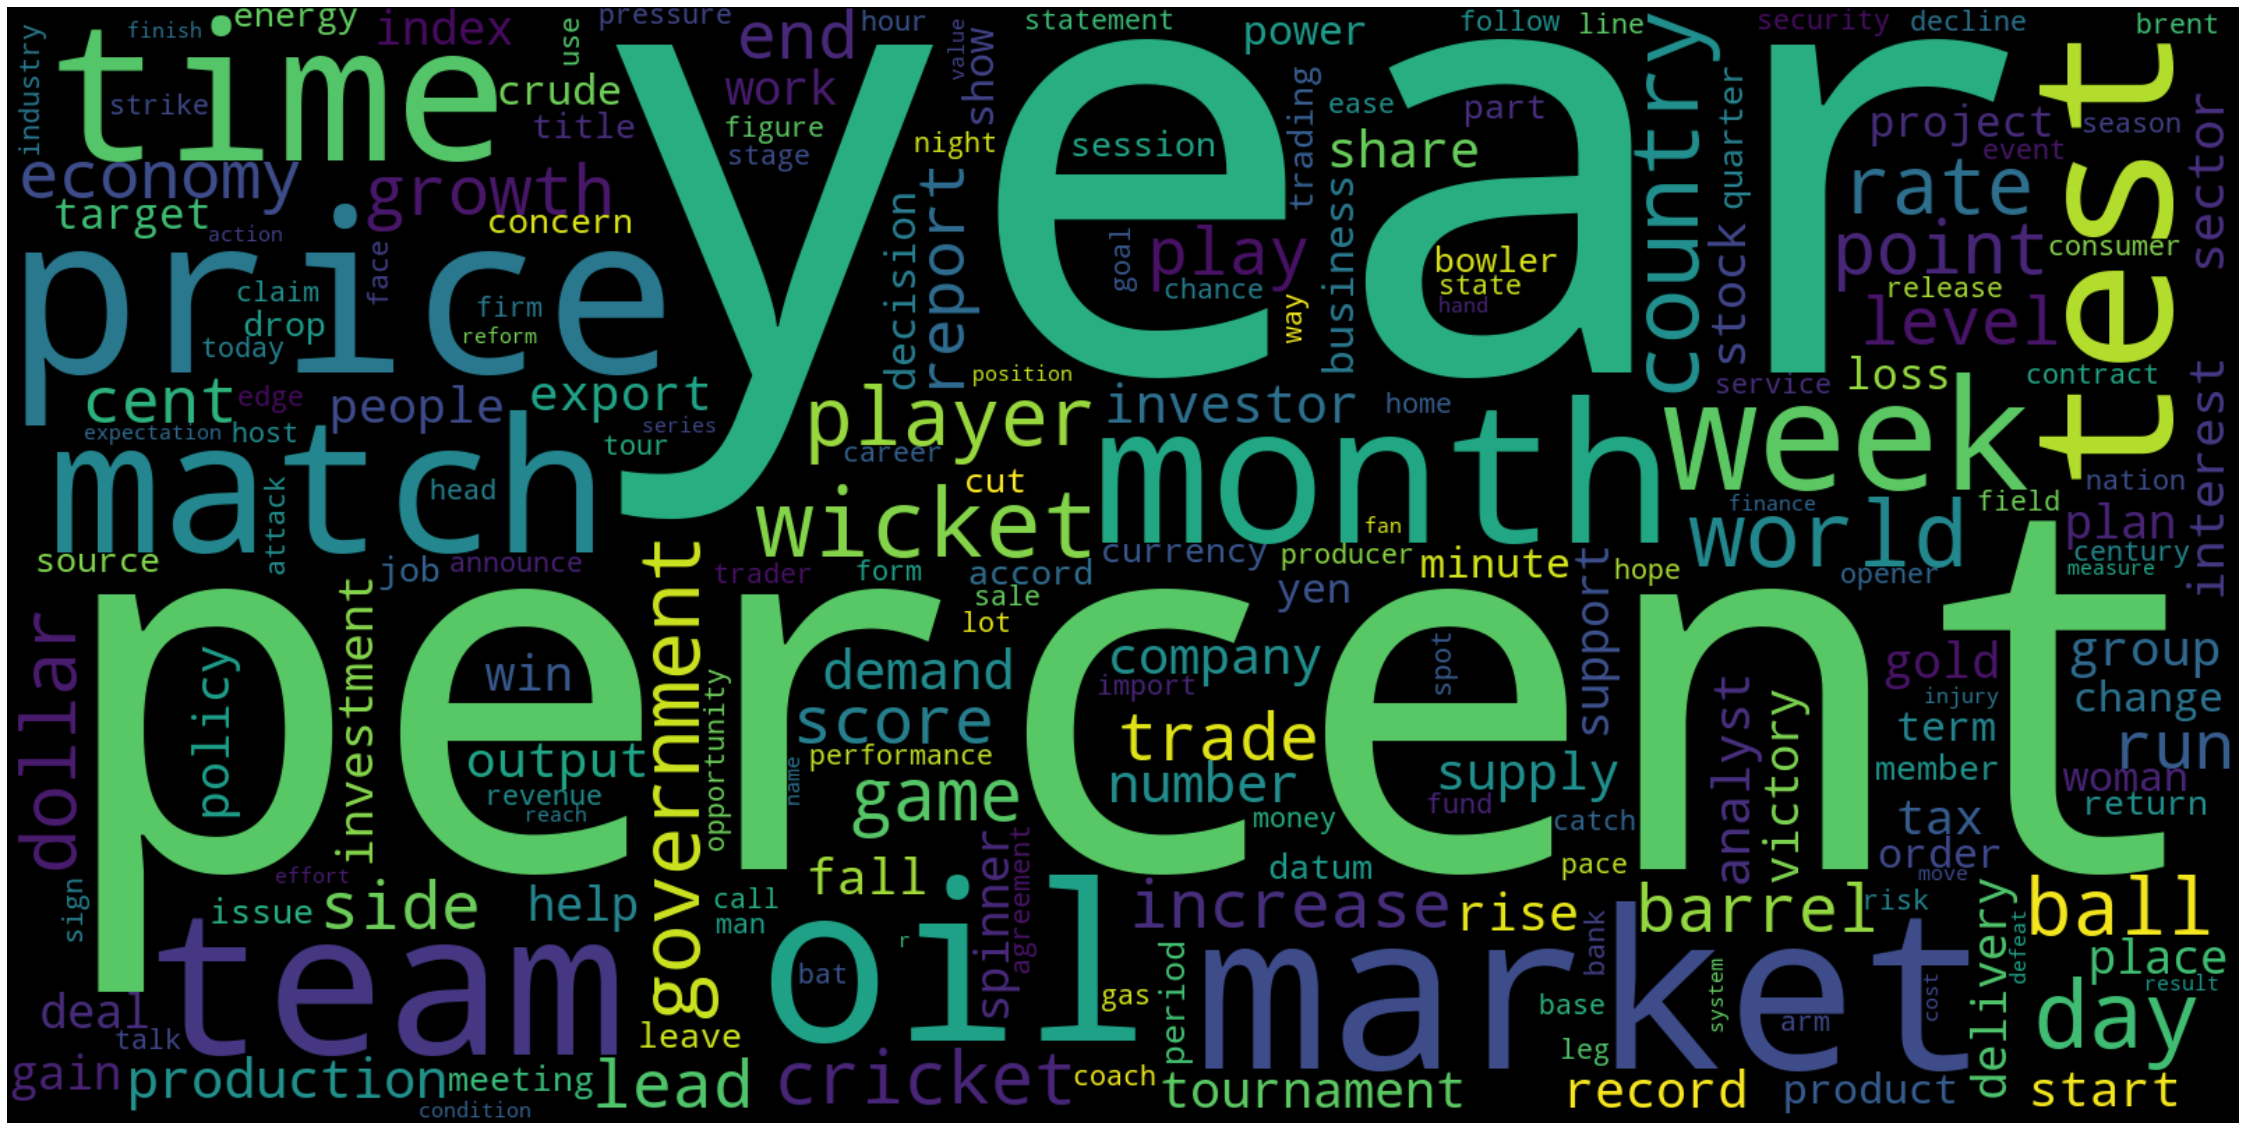

In [28]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width=1600, height=800)


wordcloud.generate_from_frequencies(frequencies=word_freq)

mpl.rcParams['figure.figsize']=(40.0,30.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=3000             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## E.2.1 Five word Pairs:
By zooming at different parts, I noticed various word pairs that were close and made sense. 
1. name & event - This might be due to sentences like name of the event or an event named etc.
2. promote & payment - Promotion usually means increase in pay
3. proposal & package - Proposing a certain package to the job candidate
4. project & investment - News related to new projects usually disclose an investment amount
5. tax & government - Governments usually decide tax rates and slabs

## E.2.2 

The word cloud represents the most frequent words in news article, which in turn means the most frequent topics in news. Few of the frequent topics in news from the word cloud are - price, oil, cricket, market and economy.